# Analisis Geoespacial y Sensores Remotos
Para este laboratorio, utilizamos la plataforma Copernicus para obtener imagenes satelitales de la region de Peten en Guatemala. Fue recortada un area de la region de Peten, y encontradas imagenes Sentinel2-L2A utilizando dias del 2020 y 2024 con una baja cobertura de nubes y trayectorias de satelite que cubrieran la mayoria del departamento. Utilizando las imagenes de las bandas 4 y 8, buscamos calcular y realizar analisis sobre los mapas NDVI de la region. Los archivos originales .tiff se encuentran dentro del folder de /data/

# Carga y Calculos
En esta seccion estaremos cargando los archivos .tiff, al igual que realizando los calculos para obtener el NDVI para 2020 y 2024. Tambien calculamos la diferencia entre ambos, para poder graficar y analizar cambios sobre el indice de vegetacion conforme el tiempo

## Imagenes del 2020

### Carga y Visualizacion
Podemos cargar los archivos .tiff utilizando la libreria Rasterio

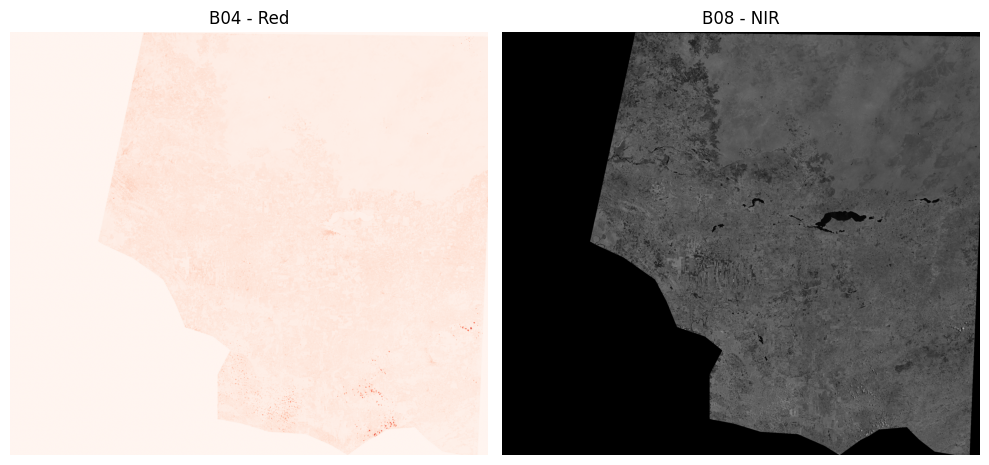

In [79]:
import rasterio
import matplotlib.pyplot as plt
from pathlib import Path
import numpy as np

# Paths para los archivos
b4_path = Path("data/2020B04.tiff")
b8_path = Path("data/2020B08.tiff")

# Abrir archivos con Rasterio
with rasterio.open(b4_path) as b4_src:
    b4 = b4_src.read(1)

with rasterio.open(b8_path) as b8_src:
    b8 = b8_src.read(1)

# Plot lado a lado
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(b4, cmap="Reds")
axes[0].set_title("B04 - Red")
axes[0].axis("off")

axes[1].imshow(b8, cmap="gray")
axes[1].set_title("B08 - NIR")
axes[1].axis("off")

plt.tight_layout()
plt.show()


Utilizando la visualizacion, logramos ver que los archivos fueron cargados correctamente y corresponden a la region del departamento de Peten en Guatemala.

### NDVI
El calculo para NDVI es

NDVI = (NIR − Rojo) / (NIR + Rojo)

In [80]:
ndvi2020 = (b8 - b4) / (b8 + b4)
ndvi2020 = np.clip(ndvi2020, -1, 1)

/tmp/ipykernel_31744/2543768970.py:1: RuntimeWarning: invalid value encountered in divide
  ndvi2020 = (b8 - b4) / (b8 + b4)


## Imagenes del 2024

### Carga y Visualizacion
Podemos cargar los archivos .tiff utilizando la libreria Rasterio

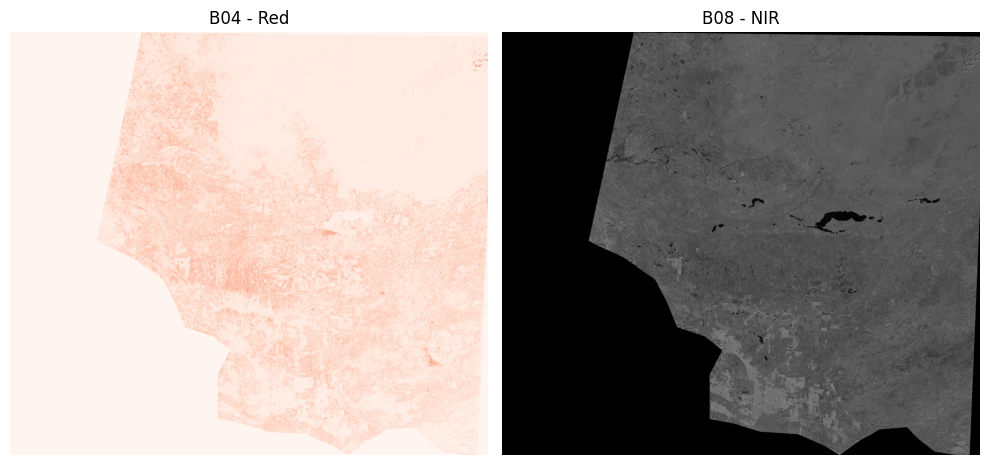

In [81]:
# Paths para los archivos
b4_path = Path("data/2024B04.tiff")
b8_path = Path("data/2024B08.tiff")

# Abrir con Rasterio
with rasterio.open(b4_path) as b4_src:
    b4 = b4_src.read(1)

with rasterio.open(b8_path) as b8_src:
    b8 = b8_src.read(1)

# Plot lado a lado
fig, axes = plt.subplots(1, 2, figsize=(10, 5))

axes[0].imshow(b4, cmap="Reds")
axes[0].set_title("B04 - Red")
axes[0].axis("off")

axes[1].imshow(b8, cmap="gray")
axes[1].set_title("B08 - NIR")
axes[1].axis("off")

plt.tight_layout()
plt.show()


### NDVI
El calculo para NDVI es

NDVI = (NIR − Rojo) / (NIR + Rojo)

In [82]:
ndvi2024 = (b8 - b4) / (b8 + b4)
ndvi2024 = np.clip(ndvi2024, -1, 1)

/tmp/ipykernel_31744/149181985.py:1: RuntimeWarning: invalid value encountered in divide
  ndvi2024 = (b8 - b4) / (b8 + b4)


## Imagen de Diferencia
Para la imagen de diferencia simplemente podemos restar NDVI de 2024 - NDVI de 2020

In [83]:
ndvi_diff = ndvi2024 - ndvi2020

## Perdida de Vegetacion
Para calcular la perdida de vegetacion, podemos simplemente establecer un treshold para determinar areas que tienen una menor vegetacion en el 2024 en comparacion a 2020

In [84]:
loss_mask = ndvi_diff <= -0.2

# Visualizaciones
En esta seccion estaremos visualizando

- Mapas NDVI lado a lado
- Imagen de diferencia
- Mascara de Deforestacion

## NDVI Lado a Lado
Para graficar el NDVI lado a lado, simplemente utilizamos necesitamos graficar las imagenes que ya cargamos al igual que una leyenda

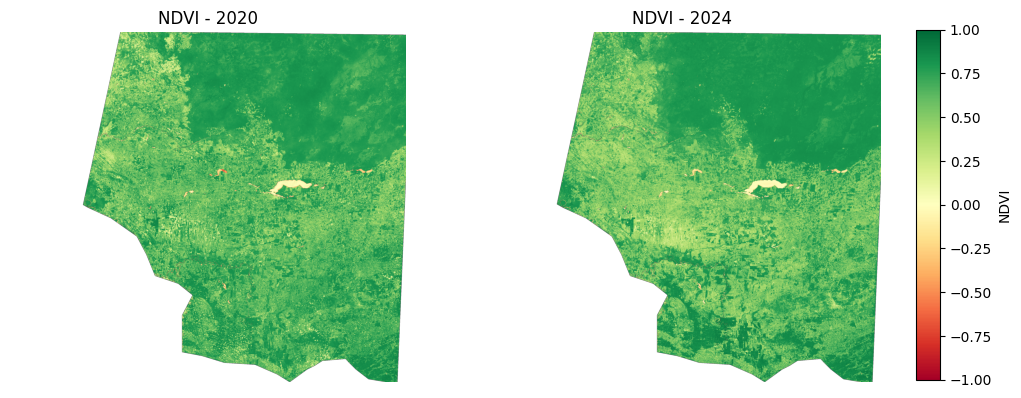

In [85]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

im1 = axes[0].imshow(ndvi2020, cmap="RdYlGn", vmin=-1, vmax=1)
axes[0].set_title("NDVI - 2020")
axes[0].axis("off")

im2 = axes[1].imshow(ndvi2024, cmap="RdYlGn", vmin=-1, vmax=1)
axes[1].set_title("NDVI - 2024")
axes[1].axis("off")

fig.subplots_adjust(right=0.85)

cbar_ax = fig.add_axes([0.88, 0.15, 0.02, 0.7])
cbar = fig.colorbar(im1, cax=cbar_ax)
cbar.set_label("NDVI")

plt.show()

## NVDI 2024 - 2020
Para graficar la diferencia de vegetacion, simplemente podemos graficar la imagen que hemos calculado

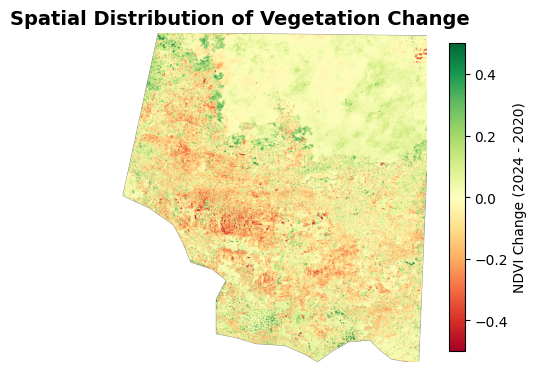

In [86]:
plt.figure(figsize=(6, 5))
plt.imshow(ndvi_diff, cmap='RdYlGn', vmin=-0.5, vmax=0.5)
plt.colorbar(label='NDVI Change (2024 - 2020)', shrink=0.8)
plt.title("Spatial Distribution of Vegetation Change", fontsize=14, fontweight='bold')
plt.axis("off")
plt.show()

## Mascara de Deforestacion
Para la mascara de deforestacion simplemente podemos graficar la mascara que habiamos calculado anteriormente

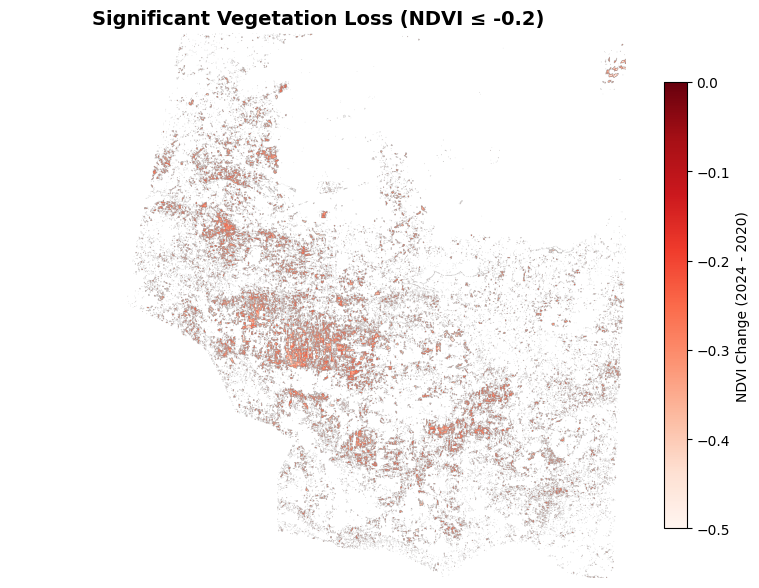

In [87]:
# Show only areas with significant loss
display_data = np.where(loss_mask, ndvi_diff, np.nan)

plt.figure(figsize=(8, 6))
im = plt.imshow(display_data, cmap='Reds', vmin=-0.5, vmax=0)
plt.colorbar(im, label='NDVI Change (2024 - 2020)', shrink=0.8)
plt.title("Significant Vegetation Loss (NDVI ≤ -0.2)", fontsize=14, fontweight='bold')
plt.axis("off")
plt.tight_layout()
plt.show()

## % de Deforestacion
Para calcular el porcentaje, podemos utilizar el 'loss mask' y calcular la cantidad de pixeles donde encontramos una perdida en vegetacion acorde al treshold

In [88]:
total_pixels = loss_mask.size
loss_pixels = np.count_nonzero(loss_mask)
loss_percentage = (loss_pixels / total_pixels) * 100
print(f"Deforested area: {loss_percentage:.2f}%")

Deforested area: 4.75%


# Analisis Adicional
Mientras que los resultados se encuentran graficados, podemos intentar ir un poco mas alla y analizar los datos obtenidos en vez de unicamente graficarlos. Buscamos responder algunas de las siguientes preguntas:

- Como se distribuye la vegetacion en 2020 en comparacion a 2024?
- Como se distribuye la perdida de vegetacion entre 2020 y 2024?
- Como se ven diferentes valores del threshold?

## Distribucion de Vegetacion

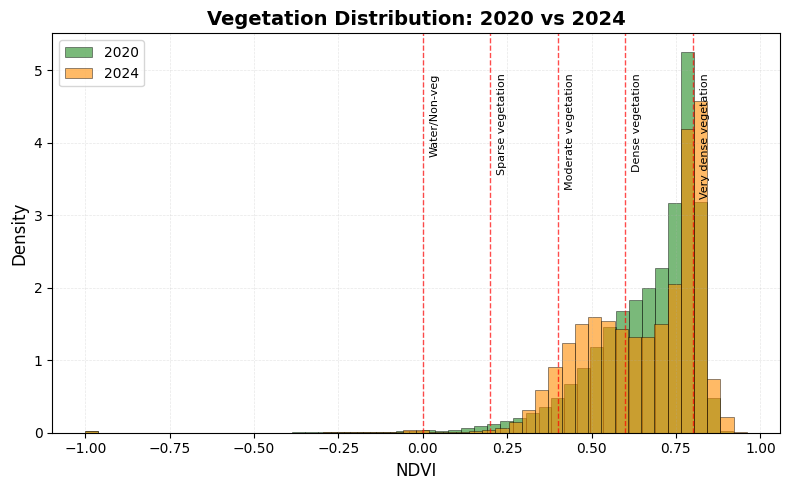

In [89]:
# Common NDVI thresholds
thresholds = {
    'Water/Non-veg': 0.0,
    'Sparse vegetation': 0.2,
    'Moderate vegetation': 0.4,
    'Dense vegetation': 0.6,
    'Very dense vegetation': 0.8
}

# Add to your existing plot
plt.figure(figsize=(8, 5))
plt.hist(ndvi2020.ravel(), bins=50, alpha=0.6, label="2020",
         color='forestgreen', edgecolor='black', linewidth=0.5, density=True)
plt.hist(ndvi2024.ravel(), bins=50, alpha=0.6, label="2024",
         color='darkorange', edgecolor='black', linewidth=0.5, density=True)

# Add threshold lines
for label, threshold in thresholds.items():
    plt.axvline(threshold, color='red', linestyle='--', alpha=0.7, linewidth=1)
    plt.text(threshold + 0.02, plt.ylim()[1] * 0.9, label, 
             rotation=90, fontsize=8, va='top')

plt.xlabel("NDVI", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.title("Vegetation Distribution: 2020 vs 2024", fontsize=14, fontweight='bold')
plt.legend()
plt.grid(alpha=0.3, linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.show()

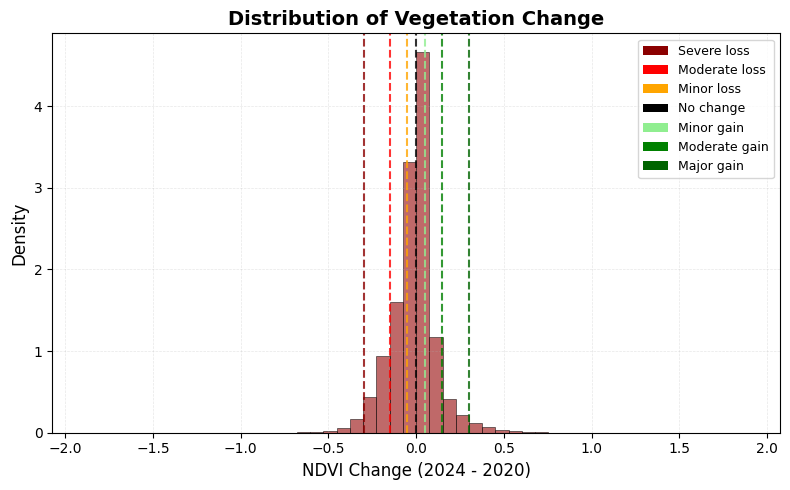

In [90]:
from matplotlib.patches import Patch

plt.figure(figsize=(8, 5))
plt.hist(ndvi_diff.ravel(), bins=50, color='brown', alpha=0.7, 
         edgecolor='black', linewidth=0.5, density=True)

# Add threshold lines
thresholds = [-0.3, -0.15, -0.05, 0, 0.05, 0.15, 0.3]
labels = ['Severe loss', 'Moderate loss', 'Minor loss', 'No change', 
          'Minor gain', 'Moderate gain', 'Major gain']
colors = ['darkred', 'red', 'orange', 'black', 'lightgreen', 'green', 'darkgreen']

# Add lines without labels
for threshold, color in zip(thresholds, colors):
    plt.axvline(threshold, color=color, linestyle='--', alpha=0.8, linewidth=1.5)

# Create legend
legend_elements = [Patch(facecolor=color, label=label) 
                   for color, label in zip(colors, labels)]
plt.legend(handles=legend_elements, loc='upper right', fontsize=9)

plt.xlabel("NDVI Change (2024 - 2020)", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.title("Distribution of Vegetation Change", fontsize=14, fontweight='bold')
plt.grid(alpha=0.3, linestyle="--", linewidth=0.5)
plt.tight_layout()
plt.show()

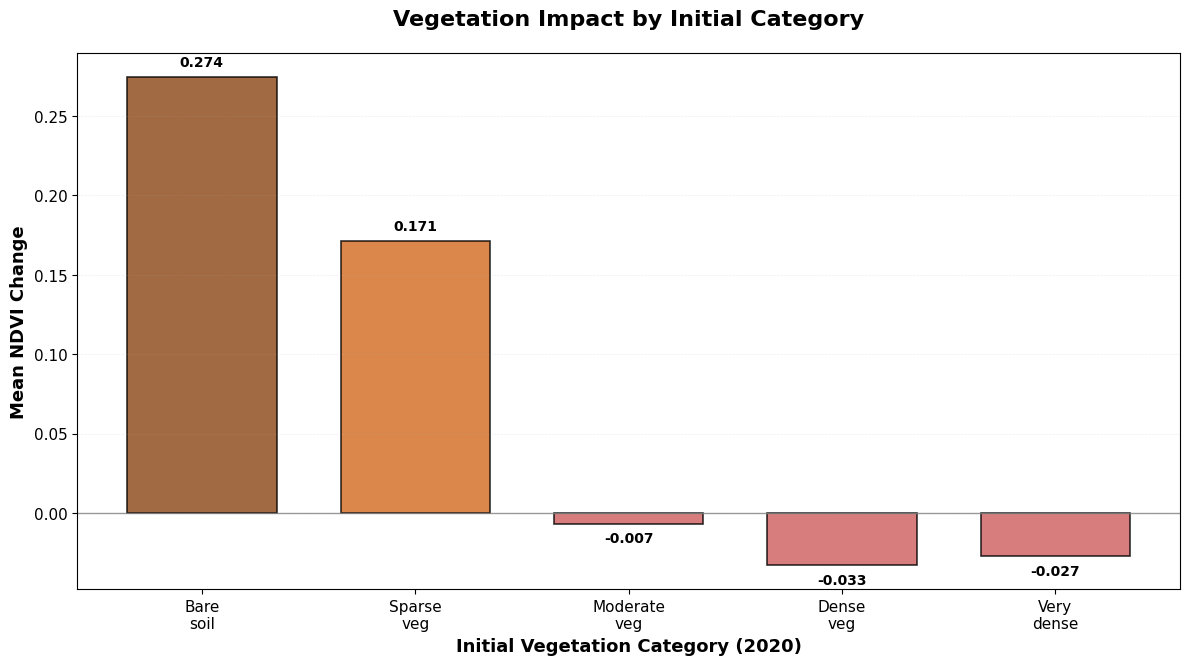

In [91]:
# Define NDVI categories with integer codes
def categorize_ndvi(ndvi):
    return np.select([
        ndvi < 0, 
        (ndvi >= 0) & (ndvi < 0.2),
        (ndvi >= 0.2) & (ndvi < 0.4),
        (ndvi >= 0.4) & (ndvi < 0.6),
        (ndvi >= 0.6) & (ndvi < 0.8),
        ndvi >= 0.8
    ], [0, 1, 2, 3, 4, 5], default=0)

# Category names
categories = ['Water/\nNon-veg', 'Bare\nsoil', 'Sparse\nveg', 'Moderate\nveg', 'Dense\nveg', 'Very\ndense']

# Categorize 2020 data
cat_2020 = categorize_ndvi(ndvi2020)

# Calculate mean change for each 2020 category
mean_changes = []
for i in range(6):
    mask = cat_2020 == i
    if np.any(mask):
        mean_change = np.mean(ndvi_diff[mask])
        mean_changes.append(mean_change)
    else:
        mean_changes.append(0)

# Plot with better styling
plt.figure(figsize=(12, 7))

# Define colors that represent the vegetation categories better
base_colors = ['#2E86C1', '#8B4513', '#D2691E', '#228B22', '#006400', '#013220']
# Adjust intensity based on change (darker if more negative change)
final_colors = []
for i, (base_color, change) in enumerate(zip(base_colors, mean_changes)):
    if change < 0:
        # Make it more red-tinted for losses
        final_colors.append('#CD5C5C')
    else:
        final_colors.append(base_color)

bars = plt.bar(categories, mean_changes, color=final_colors, alpha=0.8, 
               edgecolor='black', linewidth=1.2, width=0.7)

# Add a subtle horizontal line at zero
plt.axhline(0, color='gray', linestyle='-', alpha=0.8, linewidth=1)

plt.xlabel("Initial Vegetation Category (2020)", fontsize=13, fontweight='bold')
plt.ylabel("Mean NDVI Change", fontsize=13, fontweight='bold')
plt.title("Vegetation Impact by Initial Category", fontsize=16, fontweight='bold', pad=20)

# Remove x-axis rotation and improve spacing
plt.xticks(rotation=0, fontsize=11)
plt.yticks(fontsize=11)

# Add subtle grid
plt.grid(alpha=0.2, linestyle="--", linewidth=0.5, axis='y')

# Add value labels on bars with better positioning
for bar, value in zip(bars, mean_changes):
    height = bar.get_height()
    offset = 0.005 if height >= 0 else -0.005
    plt.text(bar.get_x() + bar.get_width()/2., height + offset,
             f'{value:.3f}', ha='center', 
             va='bottom' if height >= 0 else 'top',
             fontsize=10, fontweight='bold')

# Improve layout
plt.tight_layout()
plt.subplots_adjust(bottom=0.15)
plt.show()

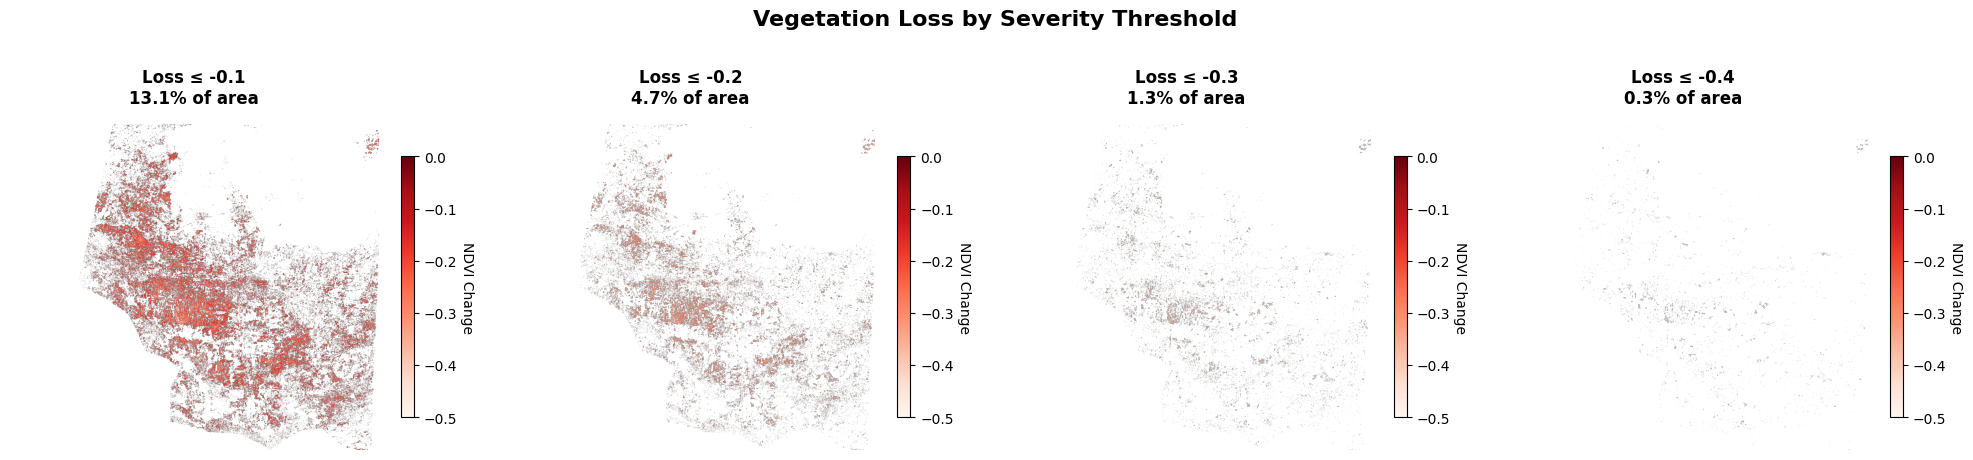

In [92]:
thresholds = [-0.1, -0.2, -0.3, -0.4]
fig, axes = plt.subplots(1, len(thresholds), figsize=(20, 5))

for ax, t in zip(axes, thresholds):
    # Create loss mask
    loss_mask = ndvi_diff <= t
    
    # Calculate percentage of pixels with loss
    total_pixels = ndvi_diff.size
    loss_pixels = np.sum(loss_mask)
    loss_percentage = (loss_pixels / total_pixels) * 100
    
    # Create visualization showing only areas meeting threshold
    display_data = np.where(loss_mask, ndvi_diff, np.nan)
    
    # Plot
    im = ax.imshow(display_data, cmap='Reds', vmin=-0.5, vmax=0)
    
    # Styling
    ax.set_title(f'Loss ≤ {t}\n{loss_percentage:.1f}% of area', 
                fontsize=12, fontweight='bold', pad=15)
    ax.axis("off")
    
    # Add colorbar for each subplot
    cbar = plt.colorbar(im, ax=ax, shrink=0.6)
    cbar.set_label('NDVI Change', rotation=270, labelpad=12, fontsize=10)

plt.suptitle('Vegetation Loss by Severity Threshold', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

# Conclusiones